In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
from tqdm import tqdm

In [2]:
Noise = True
exp = True
nonperiodic = True

DATADIR = 'ExponentiatedNonPeriodicNoisy'


periodic = not(nonperiodic)

In [3]:
H_min = 0.0
H_max = 1.0

sigma_min = 0.0
sigma_max = 3.0

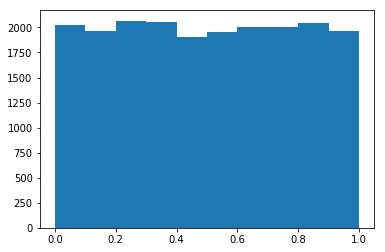

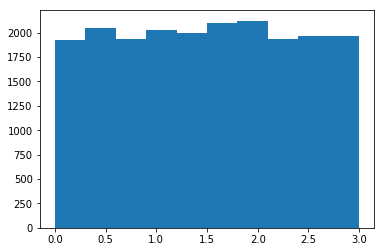

In [4]:
N = 20000

H_list = (H_max-H_min)*np.random.random(N)+H_min
sigma_list = (sigma_max-sigma_min)*np.random.random(N)+sigma_min

plt.figure()
plt.hist(H_list,bins = 10)
plt.show()

plt.figure()
plt.hist(sigma_list,bins = 10)
plt.show()

In [5]:
N_p = 128
E = 2

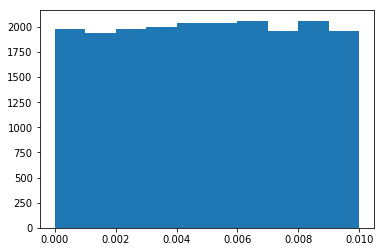

In [ ]:
if Noise:
    noise_pct_list = np.random.random(N)*0.01

    plt.figure()
    plt.hist(noise_pct_list,bins = 10)
    plt.show()

In [ ]:
for i in tqdm(range(N)):
    if periodic:
        field = ss.fBm(E=E,exp=exp,H=H_list[i],sigma = sigma_list[i],N=N_p,centred = False)
    
    if nonperiodic:
        field = ss.fBm(E=E,exp=exp,H=H_list[i],sigma = sigma_list[i],N=N_p*4,centred=False)
        field = field[int((N_p*4-N_p)/2):int((N_p*4+N_p)/2),int((N_p*4-N_p)/2):int((N_p*4+N_p)/2)]
    
    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4
        
    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)
    
    if Noise:
    
        noise = ss.fBm(E=E,exp=False, H = -1, N=N_p)

        m_1_noise = np.mean(noise)
        s_1_noise = np.std(noise)
        m_2_noise = 0
        s_2_noise = s_2_field*noise_pct_list[i]

        noise *= s_2_noise/s_1_noise
        noise += (m_2_noise-m_1_noise*s_2_noise/s_1_noise)

        field += noise
        
        
    m_1_field = np.mean(field)
    s_1_field = np.std(field)
    m_2_field = 0
    s_2_field = 1/4
        
    field *= s_2_field/s_1_field
    field += (m_2_field-m_1_field*s_2_field/s_1_field)
    
    field[np.where(field>1.)] = 1.
    field[np.where(field<-1.)] = -1.
    
    field = (field-np.min(field))/(np.max(field)-np.min(field))
    
    np.savetxt('D:/DATA/'+DATADIR+'/features/field_'+format(i,'06d')+'.txt',field)

  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
 40%|██████████████████████████████▍                                              | 7908/20000 [22:10<28:58,  6.95it/s]

In [ ]:
labels = np.zeros((N,3))

labels[:,0] = H_list
labels[:,1] = sigma_list
labels[:,2] = noise_pct_list

In [ ]:
np.savetxt('D:/DATA/'+DATADIR+'/labels/labels.txt', labels)